## **Post-Analysis Plotting Script**:

Use this script to plot astrometry/photometry/fvu/etc comparisons between legacy/single/variable-PSF modes in AIROPA.
This script assumes the following three files exist inside the working directory:
<br>
*legacy_metrics.txt*
<br>
*single_metrics.txt*
<br>
*variable_metrics.txt*

In [9]:
import os
from os import chdir, path
from glob import glob
import inspect
import numpy as np
from flystar import match
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.font_manager
import matplotlib.ticker
%matplotlib inline

legacy = np.genfromtxt('legacy_metrics.dat') # columns : name,m,m_std,x,y,r,r_std,fvu,n_detect
single = np.genfromtxt('single_metrics.dat') # columns : name,m,m_std,x,y,r,r_std,fvu,n_detect
variable = np.genfromtxt('variable_metrics.dat') # columns : name,m,m_std,x,y,r,r_std,fvu,n_detect

LS = match.match(legacy[:,3],legacy[:,4],legacy[:,1],single[:,3],single[:,4],single[:,1],dr_tol=1.5,dm_tol=0.3)
LV = match.match(legacy[:,3],legacy[:,4],legacy[:,1],variable[:,3],variable[:,4],variable[:,1],dr_tol=1.5,dm_tol=0.3)
SV = match.match(single[:,3],single[:,4],single[:,1],variable[:,3],variable[:,4],variable[:,1],dr_tol=1.5,dm_tol=0.3)

LS_matches = []
LV_matches = []
SV_matches = []

for i, j in zip(LS[0], LS[1]):
    LS_matches.append([*legacy[i], *single[j]])
    
for i, j in zip(LV[0], LV[1]):
    LV_matches.append([*legacy[i], *variable[j]])
    
for i, j in zip(SV[0], SV[1]):
    SV_matches.append([*single[i], *variable[j]])

LS_matches = np.array(LS_matches)
LV_matches = np.array(LV_matches)
SV_matches = np.array(SV_matches)

Found 0 duplicates out of 764 matches
Found 0 duplicates out of 744 matches
Found 0 duplicates out of 816 matches


## **Column headers for *_matches files**:

In [12]:
# Columns:
#0 = name1
#1 = mag1
#2 = mag_err1
#3 = x1
#4 = y1
#5 = r1
#6 = r_err1
#7 = fvu1
#8 = n_detect1
#9 = name2
#10 = mag2
#11 = mag_err2
#12 = x2
#13 = y2
#14 = r2
#15 = r_err2
#16 = fvu2
#17 = n_detect2

## **Astrometric Errors**:

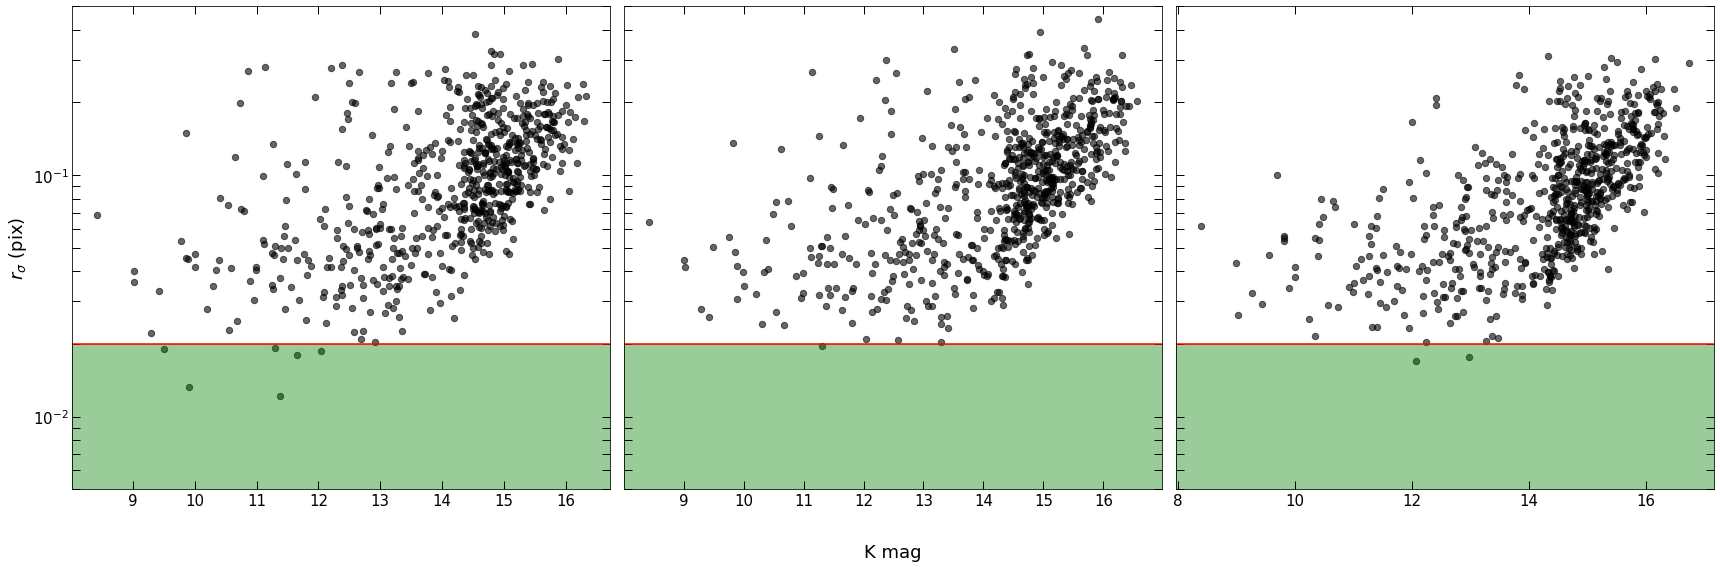

In [7]:
x, y = [8,18], [.1,.1]

fig = plt.subplots(figsize=(24,8))

ax1 = plt.subplot(131)
ax1.scatter(legacy[:,1], legacy[:,6], alpha=0.6, s=40.3, color='black', marker="o")
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.axhline(y=0.02, color='r', linestyle='-')
ax1.set_yscale('log')
#ax1.set_xlim(8,18)
ax1.set_ylim(.005,0.5)
#ax1.set_xlabel('Legacy-PSF K mag', fontsize=18)
ax1.set_ylabel(r'$r_{\sigma}$ (pix)', fontsize=18)
ax1.axhspan(.004, .02, alpha=0.4, color='green')

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax2 = plt.subplot(132, sharey=ax1)
ax2.scatter(single[:,1], single[:,6], alpha=0.6, s=40.3, color='black', marker="o")
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.axhline(y=0.02, color='r', linestyle='-')
ax2.set_yscale('log')
#ax1.set_xlim(8,18)
ax2.set_ylim(.005,0.5)
ax2.set_xlabel('K mag', fontsize=18, labelpad=35)
#ax2.set_ylabel('Variable-PSF K mag', fontsize=18)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.axhspan(.004, .02, alpha=0.4, color='green')

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax3 = plt.subplot(133, sharey=ax2)
ax3.scatter(variable[:,1], variable[:,6], alpha=0.6, s=40.3, color='black', marker="o")
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.axhline(y=0.02, color='r', linestyle='-')
ax3.set_yscale('log')
#ax1.set_xlim(8,18)
ax3.set_ylim(.005,0.5)
#ax3.set_xlabel('Single-PSF K mag', fontsize=18)
#ax3.set_ylabel('Variable-PSF K mag', fontsize=18)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.axhspan(.004, .02, alpha=0.4, color='green')

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('astrometric_errors.png', dpi=500)
plt.show()

## **Astrometric Error Correlation**:

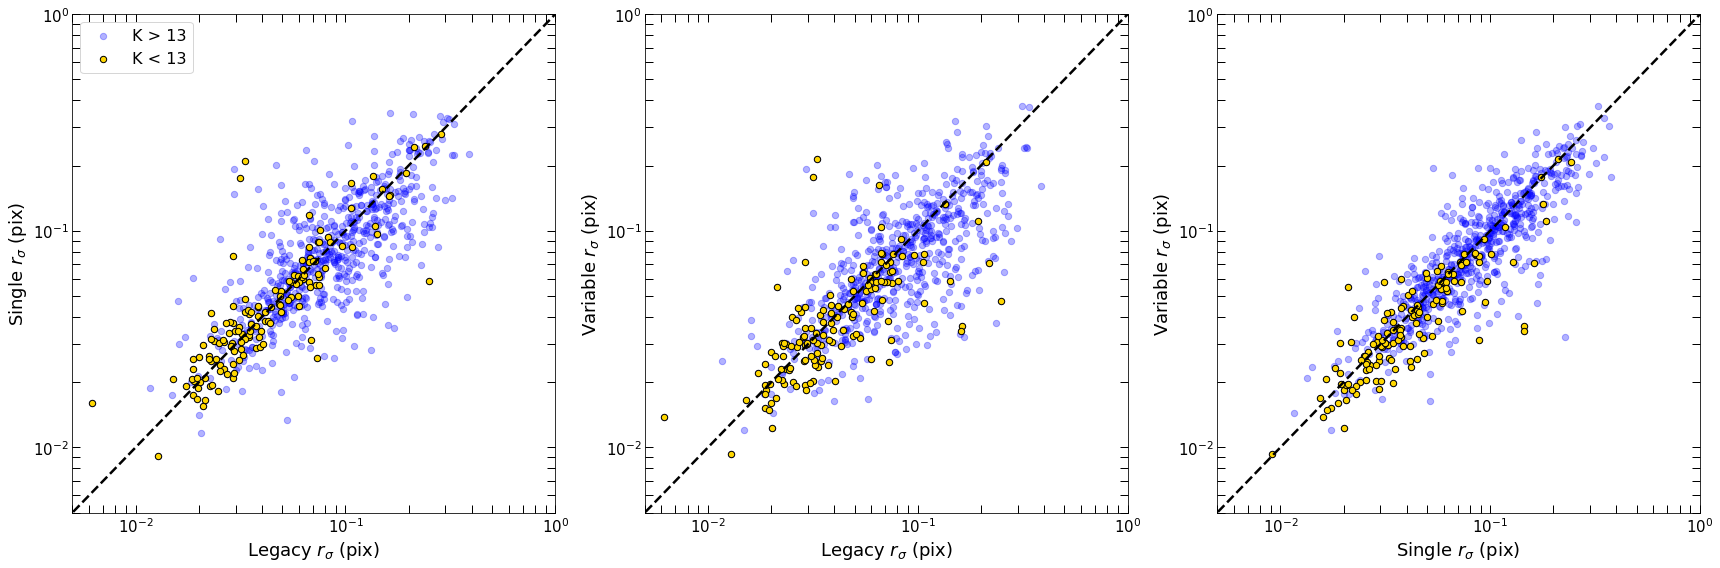

In [15]:
x, y = [0,1], [0,1]

fig = plt.subplots(figsize=(24,8))

ax1 = plt.subplot(131)
ax1.scatter(LS_matches[:,6], LS_matches[:,15], alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax1.scatter(LS_matches[0:140,6], LS_matches[0:140,15], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')
ax1.plot(x,y,'--',linewidth=2.5, color='black')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.005,1)
ax1.set_ylim(0.005,1)
ax1.set_xlabel(r'Legacy $r_{\sigma}$ (pix)', fontsize=18)
ax1.set_ylabel(r'Single $r_{\sigma}$ (pix)', fontsize=18)
ax1.legend(loc='upper left', prop={'size': 16})

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax2 = plt.subplot(132)
ax2.scatter(LV_matches[:,6], LV_matches[:,15], alpha=0.3, s=40.3, color='blue', marker="o")
ax2.scatter(LV_matches[0:140,6], LV_matches[0:140,15], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')
ax2.plot(x,y,'--',linewidth=2.5, color='black')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(0.005,1)
ax2.set_ylim(0.005,1)
ax2.set_xlabel(r'Legacy $r_{\sigma}$ (pix)', fontsize=18)
ax2.set_ylabel(r'Variable $r_{\sigma}$ (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax3 = plt.subplot(133)
ax3.scatter(SV_matches[:,6], SV_matches[:,15], alpha=0.3, s=40.3, color='blue', marker="o")
ax3.scatter(SV_matches[0:140,6], SV_matches[0:140,15], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')
ax3.plot(x,y,'--',linewidth=2.5, color='black')
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(0.005,1)
ax3.set_ylim(0.005,1)
ax3.set_xlabel(r'Single $r_{\sigma}$ (pix)', fontsize=18)
ax3.set_ylabel(r'Variable $r_{\sigma}$ (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('correlated_r_errors.png', dpi=500)
plt.show()

## **Photometric Errors**:

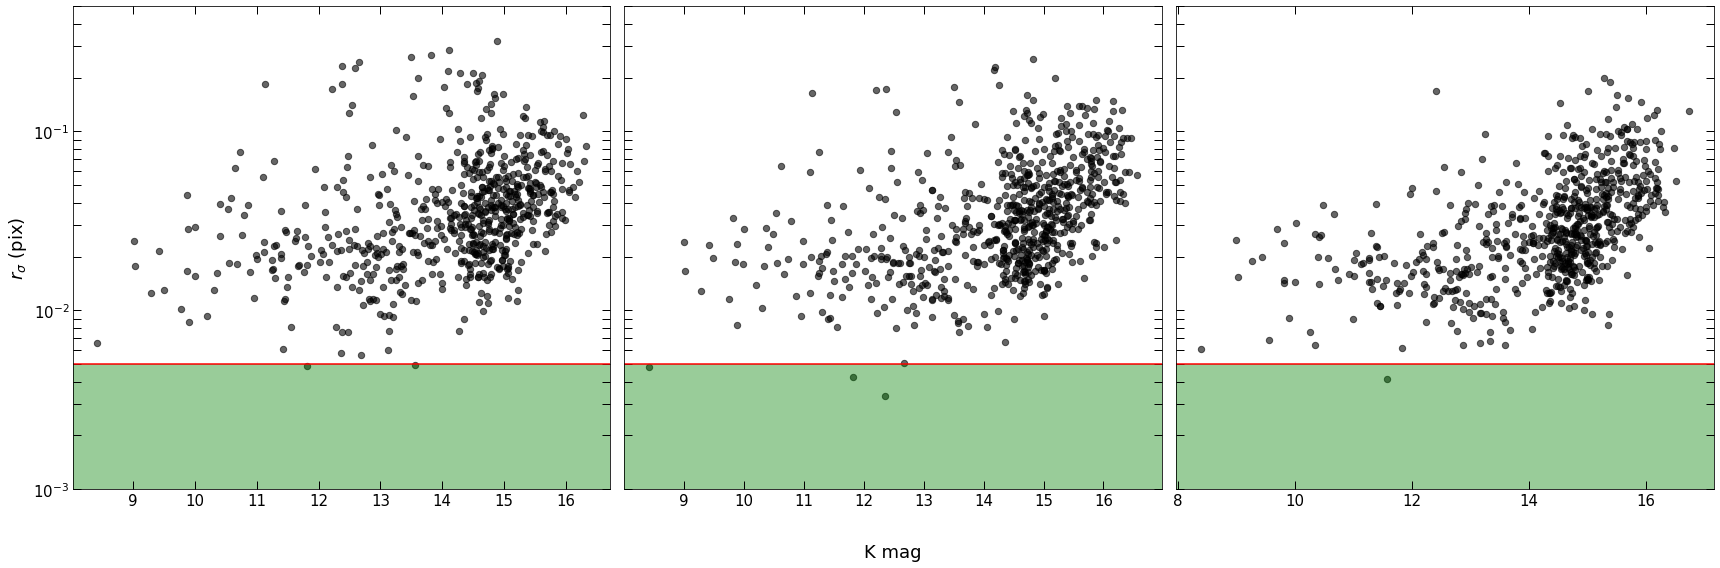

In [8]:
x, y = [8,18], [.1,.1]

fig = plt.subplots(figsize=(24,8))

ax1 = plt.subplot(131)
ax1.scatter(legacy[:,1], legacy[:,2], alpha=0.6, s=40.3, color='black', marker="o")
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.axhline(y=0.005, color='r', linestyle='-')
ax1.set_yscale('log')
#ax1.set_xlim(8,18)
ax1.set_ylim(.001,0.5)
#ax1.set_xlabel('Legacy-PSF K mag', fontsize=18)
ax1.set_ylabel(r'$r_{\sigma}$ (pix)', fontsize=18)
ax1.axhspan(.001, .005, alpha=0.4, color='green')

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax2 = plt.subplot(132, sharey=ax1)
ax2.scatter(single[:,1], single[:,2], alpha=0.6, s=40.3, color='black', marker="o")
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.axhline(y=0.005, color='r', linestyle='-')
ax2.set_yscale('log')
#ax1.set_xlim(8,18)
ax2.set_ylim(.001,0.5)
ax2.set_xlabel('K mag', fontsize=18, labelpad=35)
#ax2.set_ylabel('Variable-PSF K mag', fontsize=18)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.axhspan(.001, .005, alpha=0.4, color='green')

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax3 = plt.subplot(133, sharey=ax2)
ax3.scatter(variable[:,1], variable[:,2], alpha=0.6, s=40.3, color='black', marker="o")
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.axhline(y=0.005, color='r', linestyle='-')
ax3.set_yscale('log')
#ax1.set_xlim(8,18)
ax3.set_ylim(.001,0.5)
#ax3.set_xlabel('Single-PSF K mag', fontsize=18)
#ax3.set_ylabel('Variable-PSF K mag', fontsize=18)
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.axhspan(.001, .005, alpha=0.4, color='green')

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('photometric_errors.png', dpi=500)
plt.show()

## **Photometric Error Correlation**:

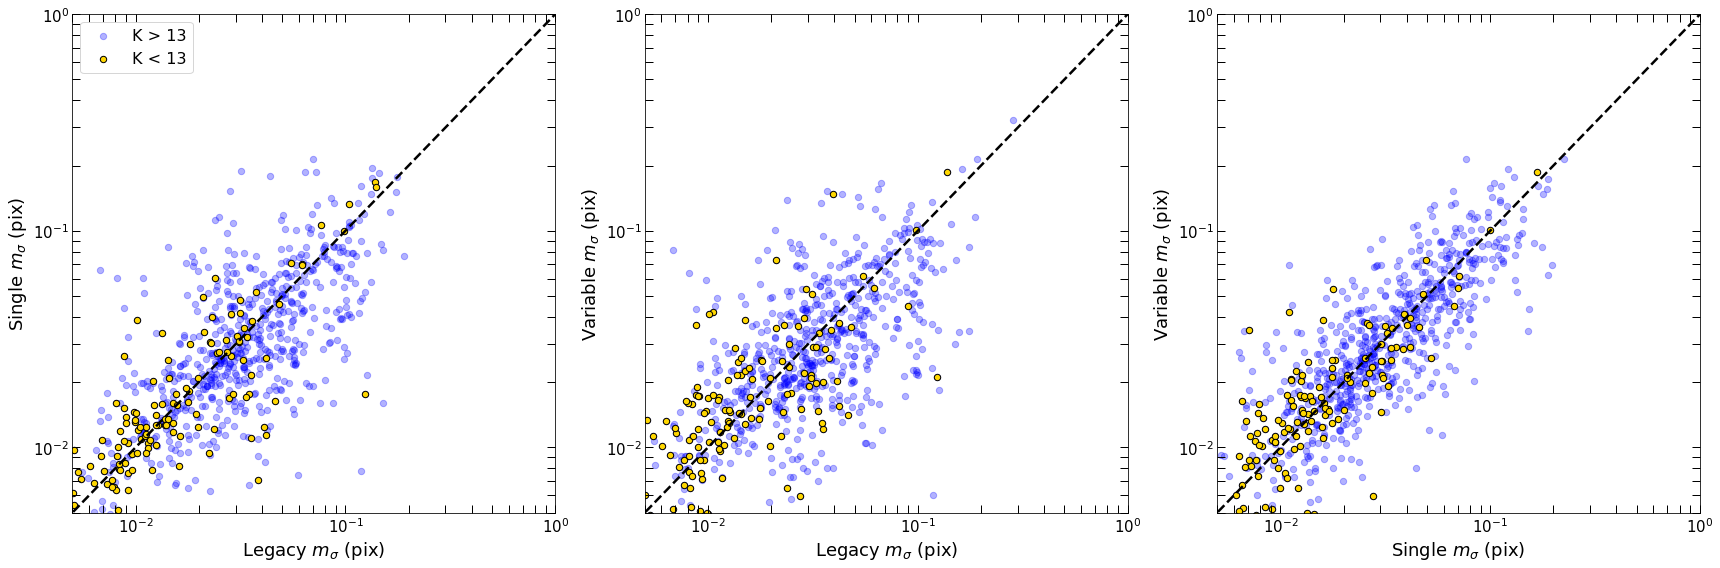

In [16]:
x, y = [0,1], [0,1]

fig = plt.subplots(figsize=(24,8))

ax1 = plt.subplot(131)
ax1.scatter(LS_matches[:,2], LS_matches[:,11], alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax1.scatter(LS_matches[0:140,2], LS_matches[0:140,11], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')
ax1.plot(x,y,'--',linewidth=2.5, color='black')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.005,1)
ax1.set_ylim(0.005,1)
ax1.set_xlabel(r'Legacy $m_{\sigma}$ (pix)', fontsize=18)
ax1.set_ylabel(r'Single $m_{\sigma}$ (pix)', fontsize=18)
ax1.legend(loc='upper left', prop={'size': 16})

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax2 = plt.subplot(132)
ax2.scatter(LV_matches[:,2], LV_matches[:,11], alpha=0.3, s=40.3, color='blue', marker="o")
ax2.scatter(LV_matches[0:140,2], LV_matches[0:140,11], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')
ax2.plot(x,y,'--',linewidth=2.5, color='black')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(0.005,1)
ax2.set_ylim(0.005,1)
ax2.set_xlabel(r'Legacy $m_{\sigma}$ (pix)', fontsize=18)
ax2.set_ylabel(r'Variable $m_{\sigma}$ (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax3 = plt.subplot(133)
ax3.scatter(SV_matches[:,2], SV_matches[:,11], alpha=0.3, s=40.3, color='blue', marker="o")
ax3.scatter(SV_matches[0:140,2], SV_matches[0:140,11], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')
ax3.plot(x,y,'--',linewidth=2.5, color='black')
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(0.005,1)
ax3.set_ylim(0.005,1)
ax3.set_xlabel(r'Single $m_{\sigma}$ (pix)', fontsize=18)
ax3.set_ylabel(r'Variable $m_{\sigma}$ (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('correlated_mag_errors.png', dpi=500)
plt.show()

## **Differential Astrometry**:

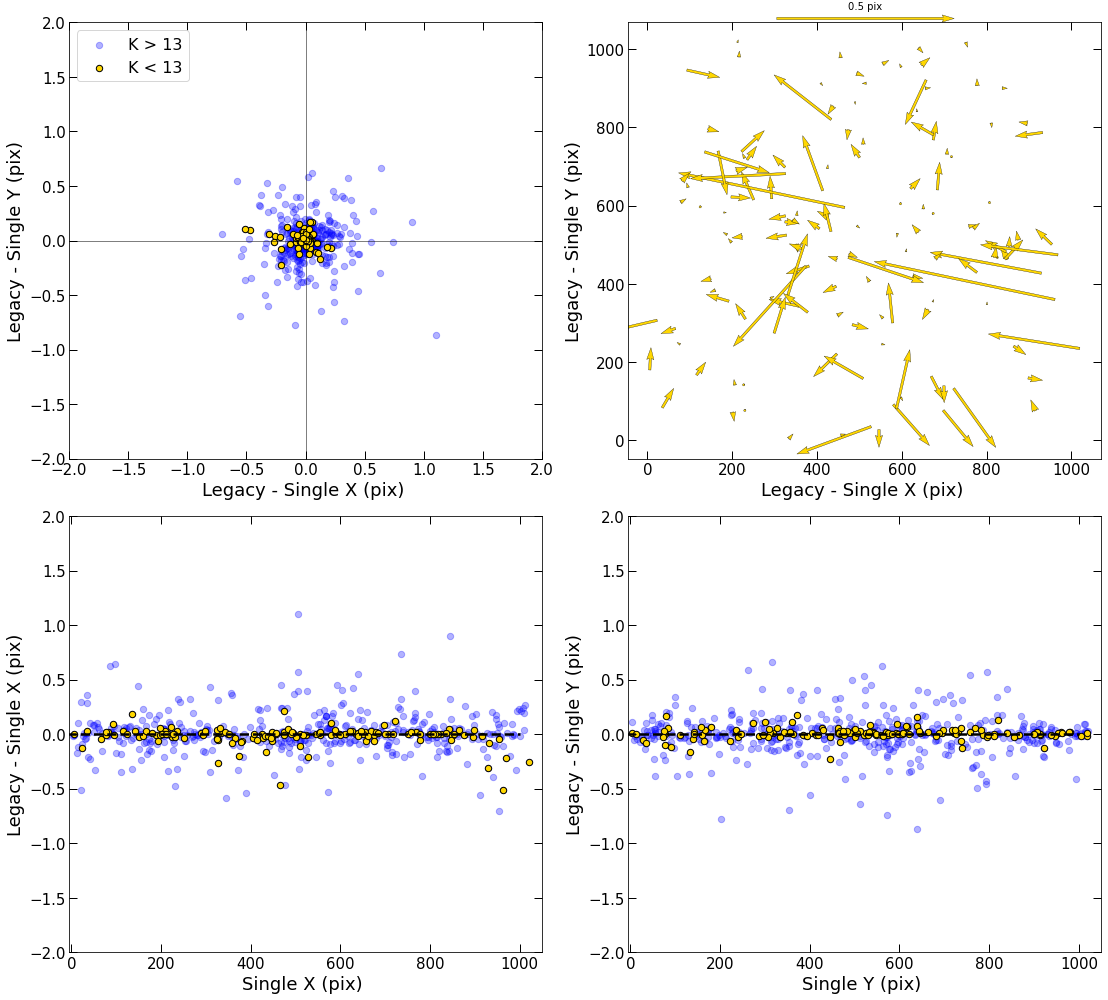

In [9]:
x1, y1 = [-10,1000], [0, 0]
x2, y2 = [0,0], [-2, 2]

fig = plt.subplots(figsize=(15.5,14))

#Xdiff vs. Ydiff Plot
ax1 = plt.subplot(221)
ax1.scatter((LS_matches[:,3] - LS_matches[:,12]), (LS_matches[:,4] - LS_matches[:,13]),
                           alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax1.scatter((LS_matches[0:140,3] - LS_matches[0:140,12]), (LS_matches[0:140,4] - LS_matches[0:140,13]),
                           alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax1.plot(x1,y1,'-',linewidth=0.5, color='black')
ax1.plot(x2,y2,'-',linewidth=0.5, color='black')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_xlabel('Legacy - Single X (pix) ', fontsize=18)
ax1.set_ylabel('Legacy - Single Y (pix)', fontsize=18)
ax1.legend(loc='upper left', prop={'size': 16})
plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Quiver Plot
ax2 = plt.subplot(222)
quiver = ax2.quiver(LS_matches[0:140,3], LS_matches[0:140,4], (LS_matches[0:140,3] - LS_matches[0:140,12]),
                    (LS_matches[0:140,4] - LS_matches[0:140,13]), color='gold', edgecolor='k', linewidth = 0.3)

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xlabel('Legacy - Single X (pix) ', fontsize=18)
ax2.set_ylabel('Legacy - Single Y (pix)', fontsize=18)
ax2.set_title(" ")
ax2.quiverkey(quiver, 0.5, 1.01, .5, '0.5 pix', labelpos='N')
plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Xdiff vs. X Plot
ax3 = plt.subplot(223)
ax3.scatter(LS_matches[:,12], (LS_matches[:,3] - LS_matches[:,12]), alpha=0.3, s=40.3,
                                            color='blue', marker="o", label='K > 13')
ax3.scatter(LS_matches[0:140,12], (LS_matches[0:140,3] - LS_matches[0:140,12]),
          alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax3.plot(x1,y1,'--',linewidth=2.5, color='black')

ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xlim(-5,1050)
ax3.set_ylim(-2,2)
ax3.set_xlabel('Single X (pix) ', fontsize=18)
ax3.set_ylabel('Legacy - Single X (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Ydiff vs. Y Plot
ax4 = plt.subplot(224)
ax4.scatter(LS_matches[:,13], (LS_matches[:,4] - LS_matches[:,13]),
            alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax4.scatter(LS_matches[0:140,13], (LS_matches[0:140,4] - LS_matches[0:140,13]),
            alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax4.plot(x1,y1,'--',linewidth=2.5, color='black')

ax4.xaxis.set_ticks_position('both')
ax4.yaxis.set_ticks_position('both')
ax4.set_xlim(-5,1050)
ax4.set_ylim(-2,2)
ax4.set_xlabel('Single Y (pix) ', fontsize=18)
ax4.set_ylabel('Legacy - Single Y (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('LS_astrometry_quad.png', dpi=500)
plt.show()

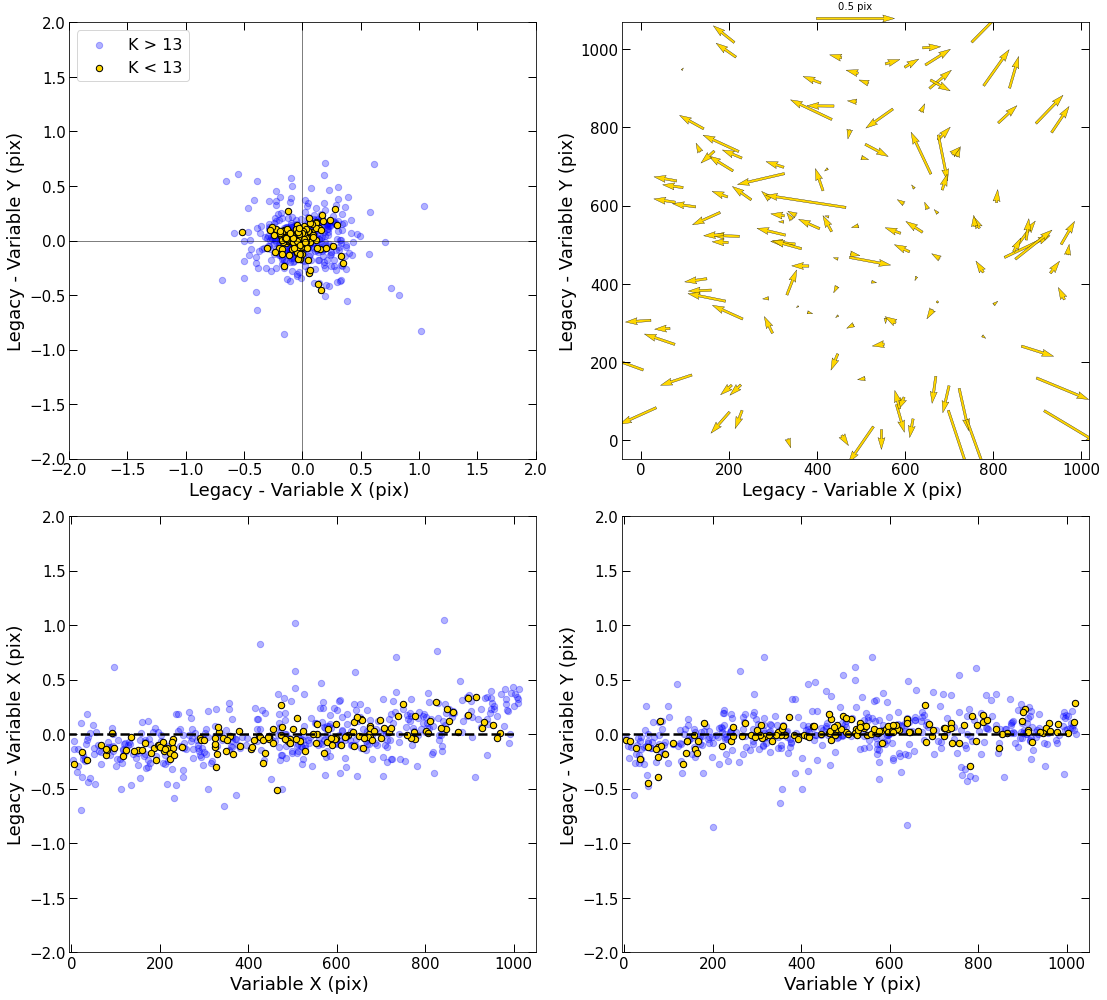

In [10]:
x1, y1 = [-10,1000], [0, 0]
x2, y2 = [0,0], [-2, 2]

fig = plt.subplots(figsize=(15.5,14))

#Xdiff vs. Ydiff Plot
ax1 = plt.subplot(221)
ax1.scatter((LV_matches[:,3] - LV_matches[:,12]), (LV_matches[:,4] - LV_matches[:,13]),
                           alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax1.scatter((LV_matches[0:140,3] - LV_matches[0:140,12]), (LV_matches[0:140,4] - LV_matches[0:140,13]),
                           alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax1.plot(x1,y1,'-',linewidth=0.5, color='black')
ax1.plot(x2,y2,'-',linewidth=0.5, color='black')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_xlabel('Legacy - Variable X (pix) ', fontsize=18)
ax1.set_ylabel('Legacy - Variable Y (pix)', fontsize=18)
ax1.legend(loc='upper left', prop={'size': 16})
plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Quiver Plot
ax2 = plt.subplot(222)
quiver = ax2.quiver(LV_matches[0:140,3], LV_matches[0:140,4], (LV_matches[0:140,3] - LV_matches[0:140,12]),
                    (LV_matches[0:140,4] - LV_matches[0:140,13]), color='gold', edgecolor='k', linewidth = 0.3)

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xlabel('Legacy - Variable X (pix) ', fontsize=18)
ax2.set_ylabel('Legacy - Variable Y (pix)', fontsize=18)
ax2.set_title(" ")
ax2.quiverkey(quiver, 0.5, 1.01, .5, '0.5 pix', labelpos='N')
plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Xdiff vs. X Plot
ax3 = plt.subplot(223)
ax3.scatter(LV_matches[:,12], (LV_matches[:,3] - LV_matches[:,12]), alpha=0.3, s=40.3,
                                            color='blue', marker="o", label='K > 13')
ax3.scatter(LV_matches[0:140,12], (LV_matches[0:140,3] - LV_matches[0:140,12]),
          alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax3.plot(x1,y1,'--',linewidth=2.5, color='black')

ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xlim(-5,1050)
ax3.set_ylim(-2,2)
ax3.set_xlabel('Variable X (pix) ', fontsize=18)
ax3.set_ylabel('Legacy - Variable X (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Ydiff vs. Y Plot
ax4 = plt.subplot(224)
ax4.scatter(LV_matches[:,13], (LV_matches[:,4] - LV_matches[:,13]),
            alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax4.scatter(LV_matches[0:140,13], (LV_matches[0:140,4] - LV_matches[0:140,13]),
            alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax4.plot(x1,y1,'--',linewidth=2.5, color='black')

ax4.xaxis.set_ticks_position('both')
ax4.yaxis.set_ticks_position('both')
ax4.set_xlim(-5,1050)
ax4.set_ylim(-2,2)
ax4.set_xlabel('Variable Y (pix) ', fontsize=18)
ax4.set_ylabel('Legacy - Variable Y (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('LV_astrometry_quad.png', dpi=500)
plt.show()

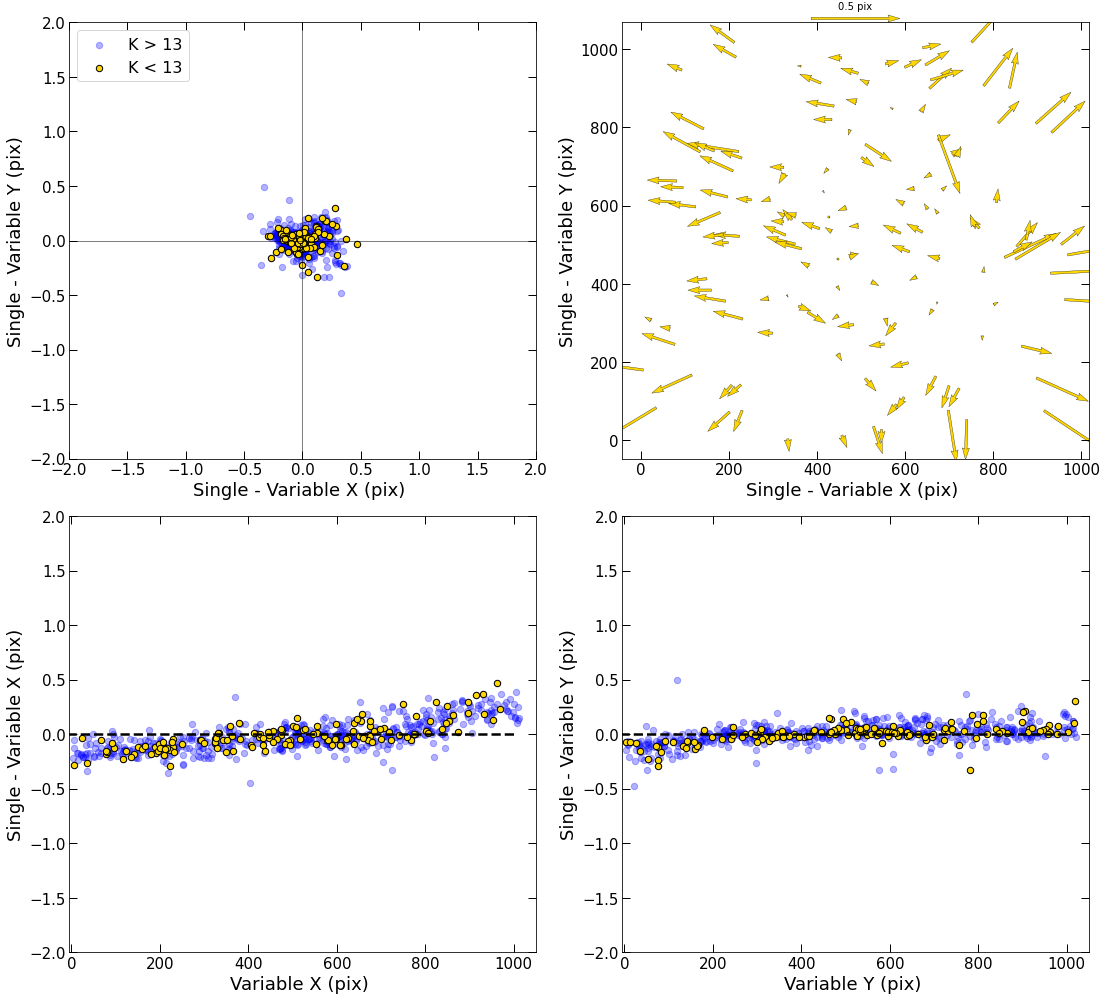

In [11]:
x1, y1 = [-10,1000], [0, 0]
x2, y2 = [0,0], [-2, 2]

fig = plt.subplots(figsize=(15.5,14))

#Xdiff vs. Ydiff Plot
ax1 = plt.subplot(221)
ax1.scatter((SV_matches[:,3] - SV_matches[:,12]), (SV_matches[:,4] - SV_matches[:,13]),
                           alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax1.scatter((SV_matches[0:140,3] - SV_matches[0:140,12]), (SV_matches[0:140,4] - SV_matches[0:140,13]),
                           alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax1.plot(x1,y1,'-',linewidth=0.5, color='black')
ax1.plot(x2,y2,'-',linewidth=0.5, color='black')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_xlabel('Single - Variable X (pix) ', fontsize=18)
ax1.set_ylabel('Single - Variable Y (pix)', fontsize=18)
ax1.legend(loc='upper left', prop={'size': 16})
plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Quiver Plot
ax2 = plt.subplot(222)
quiver = ax2.quiver(SV_matches[0:140,3], SV_matches[0:140,4], (SV_matches[0:140,3] - SV_matches[0:140,12]),
                    (SV_matches[0:140,4] - SV_matches[0:140,13]), color='gold', edgecolor='k', linewidth = 0.3)

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xlabel('Single - Variable X (pix) ', fontsize=18)
ax2.set_ylabel('Single - Variable Y (pix)', fontsize=18)
ax2.set_title(" ")
ax2.quiverkey(quiver, 0.5, 1.01, .5, '0.5 pix', labelpos='N')
plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Xdiff vs. X Plot
ax3 = plt.subplot(223)
ax3.scatter(SV_matches[:,12], (SV_matches[:,3] - SV_matches[:,12]), alpha=0.3, s=40.3,
                                            color='blue', marker="o", label='K > 13')
ax3.scatter(SV_matches[0:140,12], (SV_matches[0:140,3] - SV_matches[0:140,12]),
          alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax3.plot(x1,y1,'--',linewidth=2.5, color='black')

ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xlim(-5,1050)
ax3.set_ylim(-2,2)
ax3.set_xlabel('Variable X (pix) ', fontsize=18)
ax3.set_ylabel('Single - Variable X (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

#Ydiff vs. Y Plot
ax4 = plt.subplot(224)
ax4.scatter(SV_matches[:,13], (SV_matches[:,4] - SV_matches[:,13]),
            alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax4.scatter(SV_matches[0:140,13], (SV_matches[0:140,4] - SV_matches[0:140,13]),
            alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax4.plot(x1,y1,'--',linewidth=2.5, color='black')

ax4.xaxis.set_ticks_position('both')
ax4.yaxis.set_ticks_position('both')
ax4.set_xlim(-5,1050)
ax4.set_ylim(-2,2)
ax4.set_xlabel('Variable Y (pix) ', fontsize=18)
ax4.set_ylabel('Single - Variable Y (pix)', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('SV_astrometry_quad.png', dpi=500)
plt.show()

## **Photometry Correlation**:

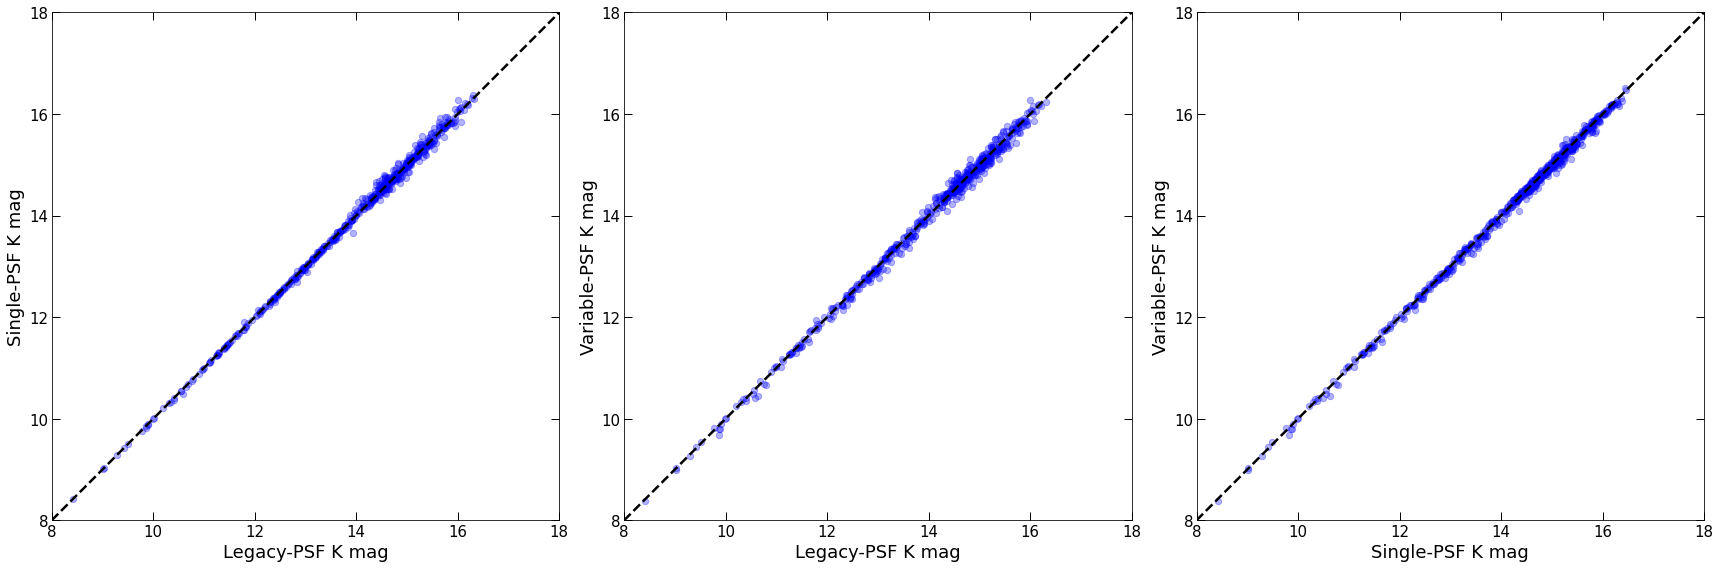

In [12]:
x, y = [8,18], [8, 18]

fig = plt.subplots(figsize=(24,8))

ax1 = plt.subplot(131)
ax1.scatter(LS_matches[:,1], LS_matches[:,10], alpha=0.3, s=40.3, color='blue', marker="o")
ax1.plot(x,y,'--',linewidth=2.5, color='black')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(8,18)
ax1.set_ylim(8,18)
ax1.set_xlabel('Legacy-PSF K mag', fontsize=18)
ax1.set_ylabel('Single-PSF K mag', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax2 = plt.subplot(132)
ax2.scatter(LV_matches[:,1], LV_matches[:,10], alpha=0.3, s=40.3, color='blue', marker="o")
ax2.plot(x,y,'--',linewidth=2.5, color='black')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xlim(8,18)
ax2.set_ylim(8,18)
ax2.set_xlabel('Legacy-PSF K mag', fontsize=18)
ax2.set_ylabel('Variable-PSF K mag', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax3 = plt.subplot(133)
ax3.scatter(SV_matches[:,1], SV_matches[:,10], alpha=0.3, s=40.3, color='blue', marker="o")
ax3.plot(x,y,'--',linewidth=2.5, color='black')
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xlim(8,18)
ax3.set_ylim(8,18)
ax3.set_xlabel('Single-PSF K mag', fontsize=18)
ax3.set_ylabel('Variable-PSF K mag', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('correlated_mags.png', dpi=500)
plt.show()

## **FVU Correlation**:

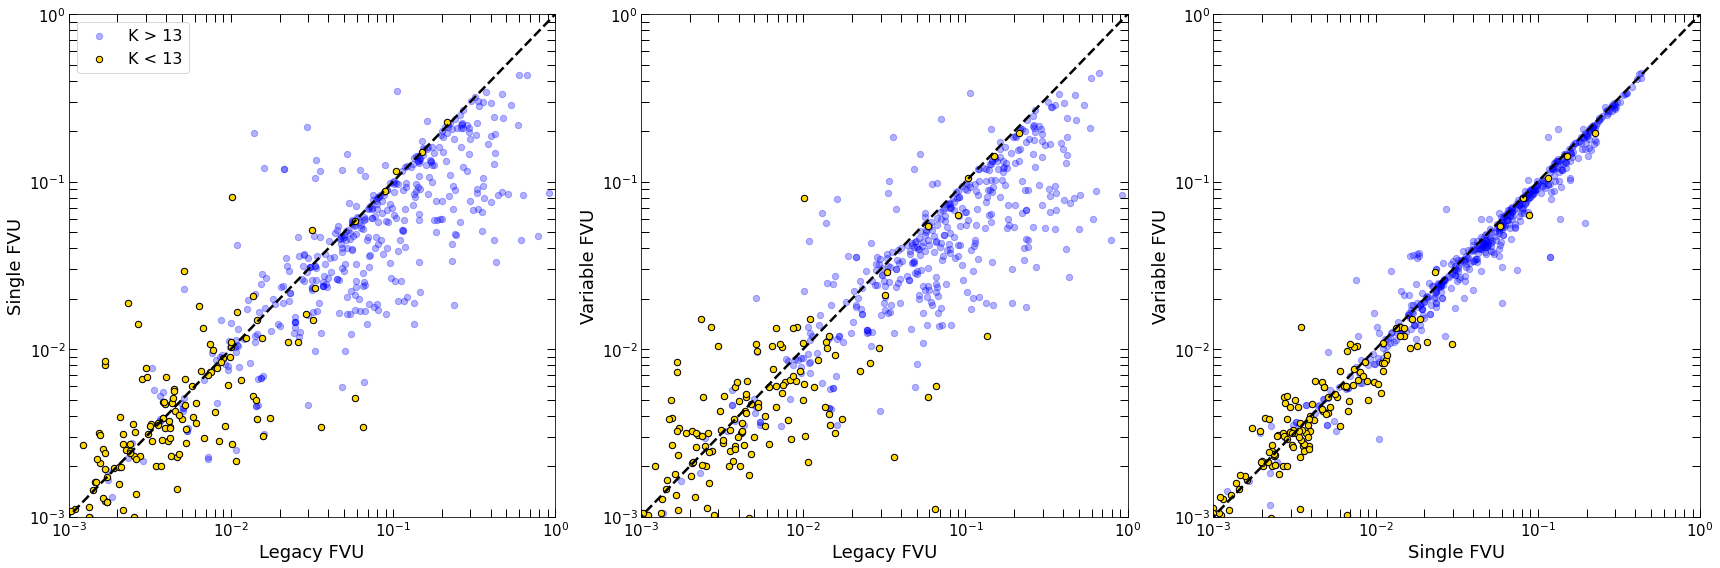

In [13]:
x1, y1 = [0,1], [0,1]

fig = plt.subplots(figsize=(24,8))

ax1 = plt.subplot(131)
ax1.scatter(LS_matches[:,7], LS_matches[:,16], alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax1.scatter(LS_matches[0:140,7], LS_matches[0:140,16], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax1.plot(x1,y1,'--',linewidth=2.5, color='black')

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.001,1)
ax1.set_ylim(0.001,1)
ax1.set_xlabel('Legacy FVU', fontsize=18)
ax1.set_ylabel('Single FVU', fontsize=18)
ax1.legend(loc='upper left', prop={'size': 16})

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax2 = plt.subplot(132)
ax2.scatter(LV_matches[:,7], LV_matches[:,16], alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax2.scatter(LV_matches[0:140,7], LV_matches[0:140,16], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax2.plot(x1,y1,'--',linewidth=2.5, color='black')

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(0.001,1)
ax2.set_ylim(0.001,1)
ax2.set_xlabel('Legacy FVU', fontsize=18)
ax2.set_ylabel('Variable FVU', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

ax3 = plt.subplot(133)
ax3.scatter(SV_matches[:,7], SV_matches[:,16], alpha=0.3, s=40.3, color='blue', marker="o", label='K > 13')
ax3.scatter(SV_matches[1:140,7], SV_matches[1:140,16], alpha=1.0, s=40.3, color='gold', marker="o", label='K < 13', edgecolor='k')

ax3.plot(x1,y1,'--',linewidth=2.5, color='black')

ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(0.001,1)
ax3.set_ylim(0.001,1)
ax3.set_xlabel('Single FVU', fontsize=18)
ax3.set_ylabel('Variable FVU', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.tight_layout()
plt.savefig('correlated_fvu_loglog.png', dpi=500)
plt.show()

## **Luminosity Function**:

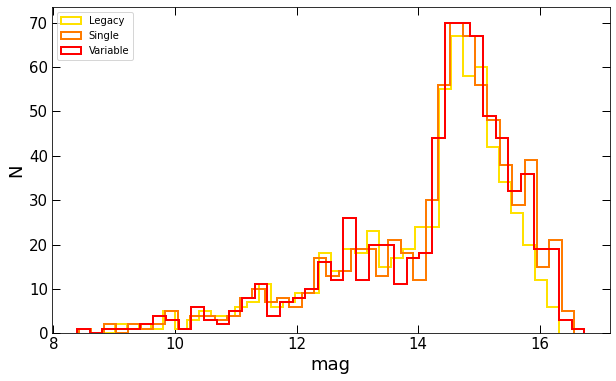

In [14]:
fig = plt.subplots(figsize=(10,6))

ax = plt.subplot(111)
plt.hist(legacy[:,1], density=False, bins=40, histtype='step', color='#ffe100', linewidth=2, label='Legacy')
plt.hist(single[:,1], density=False, bins=40, histtype='step', color='#ff7b00', linewidth=2, label='Single')
plt.hist(variable[:,1], density=False, bins=40, histtype='step', color='#ff0000', linewidth=2, label='Variable')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
#plt.xlim(8,18)
#plt.ylim(0,2)
plt.ylabel('N', fontsize=18)
plt.xlabel('mag', fontsize=18)

plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.legend(markerscale=4.0, loc='upper left')
plt.savefig('all_LFs.png', dpi=500)
#plt.savefig('all_fvuRatio.pdf')
plt.show()